In [10]:
import os

# Specify the directory path
directory_path = './Brno University of Technology Smartphone PPG Database (BUT PPG) v2.0.0/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/112066'

# List all files and subdirectories in the directory
items = os.listdir(directory_path)

# Print the items
for item in items:
    print(item)

112066.qrs
112066_ACC.dat
112066_ACC.hea
112066_ECG.dat
112066_ECG.hea
112066_PPG.dat
112066_PPG.hea


In [9]:
!pip install numpy scipy pandas matplotlib wfdb scikit-learn tensorflow

In [23]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_path = './Brno University of Technology Smartphone PPG Database (BUT PPG) v2.0.0/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/'
record_name = '112066'
record_path = os.path.join(data_path, record_name)  # Sử dụng os.path.join để đảm bảo đường dẫn đúng

print(record_path)


./Brno University of Technology Smartphone PPG Database (BUT PPG) v2.0.0/brno-university-of-technology-smartphone-ppg-database-but-ppg-2.0.0/112066


In [24]:
import os

# Kiểm tra thư mục
if os.path.exists(data_path):
    print("Thư mục dữ liệu tồn tại.")
    # Liệt kê các tệp tin
    files = os.listdir(data_path)
    print(f"Có {len(files)} tệp tin trong thư mục dữ liệu.")
    print(files[:10])  # In 10 tệp đầu tiên
else:
    print("Thư mục dữ liệu không tồn tại. Vui lòng kiểm tra lại đường dẫn.")


Thư mục dữ liệu tồn tại.
Có 3894 tệp tin trong thư mục dữ liệu.
['100001', '100002', '100003', '100004', '101001', '101002', '101003', '101004', '102001', '102002']


In [25]:
import os

# Đường dẫn đến thư mục con chứa dữ liệu
data_path = record_path

# Kiểm tra thư mục con
if os.path.exists(data_path):
    print("Thư mục con chứa dữ liệu tồn tại.")
    # Liệt kê các tệp tin trong thư mục con
    files = os.listdir(data_path)
    print(f"Có {len(files)} tệp tin trong thư mục con dữ liệu.")
    print(files[:10])  # In 10 tệp đầu tiên
else:
    print("Thư mục con dữ liệu không tồn tại. Vui lòng kiểm tra lại đường dẫn.")


Thư mục con chứa dữ liệu tồn tại.
Có 7 tệp tin trong thư mục con dữ liệu.
['112066.qrs', '112066_ACC.dat', '112066_ACC.hea', '112066_ECG.dat', '112066_ECG.hea', '112066_PPG.dat', '112066_PPG.hea']


In [26]:
# Liệt kê tất cả các tệp tin trong thư mục con
files = os.listdir(data_path)
print("Các tệp tin trong thư mục con dữ liệu:")
for file in files:
    print(file)


Các tệp tin trong thư mục con dữ liệu:
112066.qrs
112066_ACC.dat
112066_ACC.hea
112066_ECG.dat
112066_ECG.hea
112066_PPG.dat
112066_PPG.hea


In [27]:
# Đọc tệp tiêu đề để kiểm tra tên các kênh
record_name = '112066_ACC'
record_path = os.path.join(data_path, record_name)
try:
    record_header = wfdb.rdheader(record_path)
    print("Tên các kênh trong bản ghi:")
    print(record_header.sig_name)
except FileNotFoundError as e:
    print(e)
    raise


Tên các kênh trong bản ghi:
['ACC_X', 'ACC_Y', 'ACC_Z']


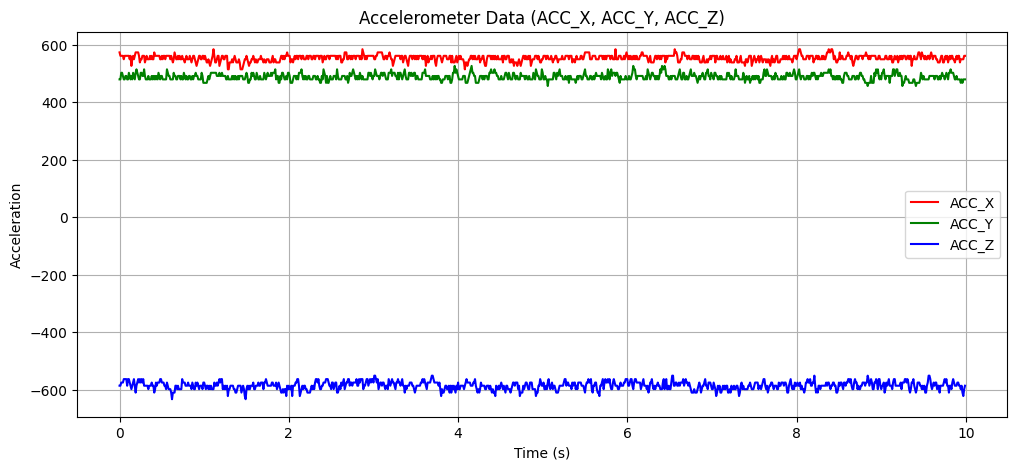

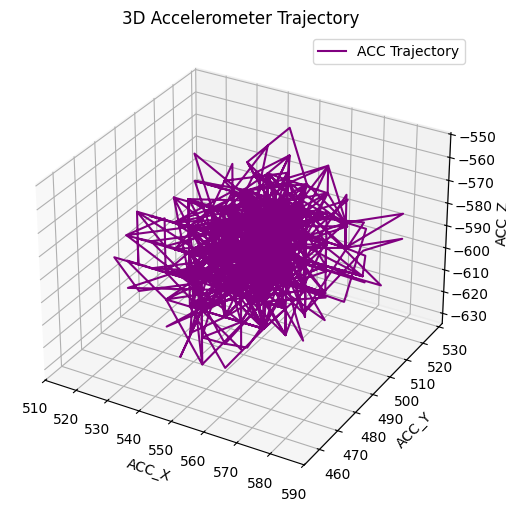

In [35]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Đọc tín hiệu ACC
record_name = "112066_ACC"
record_path = os.path.join(data_path, record_name)
record = wfdb.rdrecord(record_path)  # Đọc file .dat và .hea

# Lấy dữ liệu của các trục
acc_x = record.p_signal[:, 0]  # Kênh 1 - ACC_X
acc_y = record.p_signal[:, 1]  # Kênh 2 - ACC_Y
acc_z = record.p_signal[:, 2]  # Kênh 3 - ACC_Z

# Tạo trục thời gian (dựa vào tần số lấy mẫu ACC, thường là 100 Hz)
fs = record.fs  # Tần số lấy mẫu
time = np.arange(len(acc_x)) / fs  # Thời gian tính bằng giây

# Vẽ biểu đồ 2D
plt.figure(figsize=(12, 5))
plt.plot(time, acc_x, label="ACC_X", color="r")
plt.plot(time, acc_y, label="ACC_Y", color="g")
plt.plot(time, acc_z, label="ACC_Z", color="b")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.title("Accelerometer Data (ACC_X, ACC_Y, ACC_Z)")
plt.legend()
plt.grid()
plt.show()


from mpl_toolkits.mplot3d import Axes3D

# Vẽ quỹ đạo trong không gian 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(acc_x, acc_y, acc_z, label='ACC Trajectory', color='purple')

ax.set_xlabel("ACC_X")
ax.set_ylabel("ACC_Y")
ax.set_zlabel("ACC_Z")
ax.set_title("3D Accelerometer Trajectory")
ax.legend()
plt.show()

In [36]:
# Đọc tệp tiêu đề để kiểm tra tên các kênh
record_name = '112066_ECG'
record_path = os.path.join(data_path, record_name)
try:
    record_header = wfdb.rdheader(record_path)
    print("Tên các kênh trong bản ghi:")
    print(record_header.sig_name)
except FileNotFoundError as e:
    print(e)
    raise


Tên các kênh trong bản ghi:
['ECG']


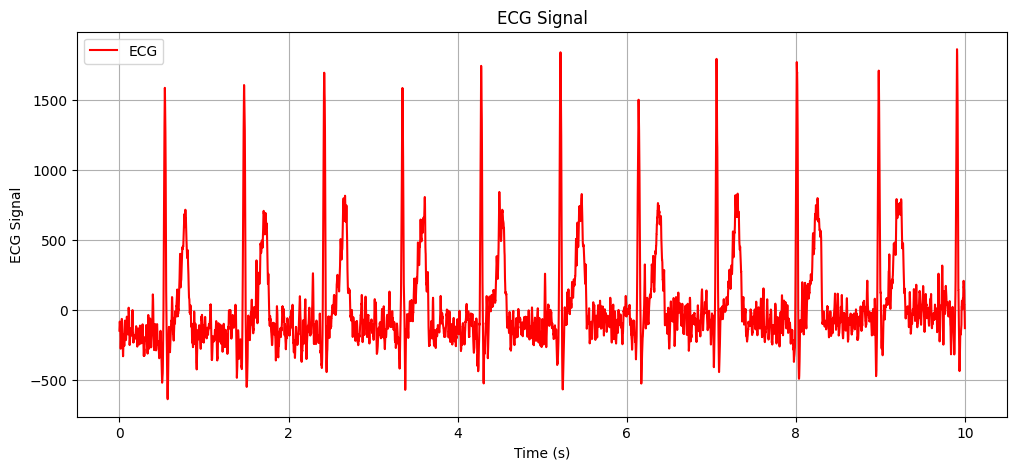

In [45]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Đọc tín hiệu ACC
record_name = '112066_ECG'
record_path = os.path.join(data_path, record_name)
record = wfdb.rdrecord(record_path)  # Đọc file .dat và .hea

# Lấy dữ liệu của các trục
ecg = record.p_signal[:, 0]  # Kênh 1 - ACC_X

fs = record.fs  # Tần số lấy mẫu
time = np.arange(len(acc_x)) / fs  # Thời gian tính bằng giây

# Vẽ biểu đồ 2D
plt.figure(figsize=(12, 5))
plt.plot(time, ecg, label="ECG", color="r")
plt.xlabel("Time (s)")
plt.ylabel("ECG Signal")
plt.title("ECG Signal")
plt.legend()
plt.grid()
plt.show()

In [46]:
# Đọc tệp tiêu đề để kiểm tra tên các kênh
record_name = '112066_PPG'
record_path = os.path.join(data_path, record_name)
try:
    record_header = wfdb.rdheader(record_path)
    print("Tên các kênh trong bản ghi:")
    print(record_header.sig_name)
except FileNotFoundError as e:
    print(e)
    raise


Tên các kênh trong bản ghi:
['.u. 0 0 27361 -30411 0 PPG_R', '.u. 0 0 23938 13904 0 PPG_G', '.u. 0 0 26931 -23776 0 PPG_B']


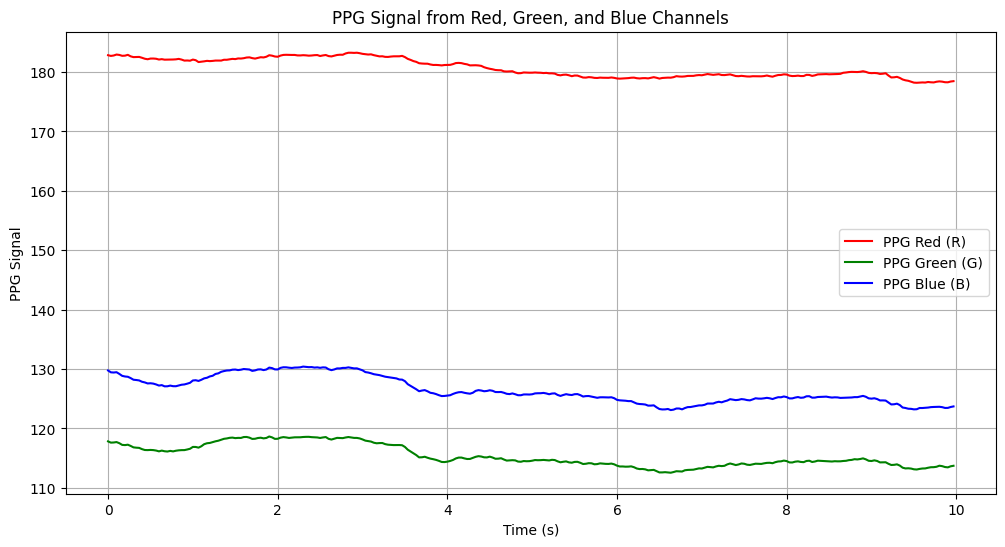

In [47]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp PPG
record_name = '112066_PPG'
record_path = os.path.join(data_path, record_name)
record = wfdb.rdrecord(record_path)

# Lấy dữ liệu từ ba kênh PPG (R, G, B)
ppg_r = record.p_signal[:, 0]  # Kênh PPG_R (Red)
ppg_g = record.p_signal[:, 1]  # Kênh PPG_G (Green)
ppg_b = record.p_signal[:, 2]  # Kênh PPG_B (Blue)

# Tần số lấy mẫu (sampling rate)
fs = record.fs
time = np.arange(len(ppg_r)) / fs  # Thời gian tính bằng giây

# Vẽ các tín hiệu PPG từ ba kênh
plt.figure(figsize=(12, 6))
plt.plot(time, ppg_r, label="PPG Red (R)", color="r")
plt.plot(time, ppg_g, label="PPG Green (G)", color="g")
plt.plot(time, ppg_b, label="PPG Blue (B)", color="b")
plt.xlabel("Time (s)")
plt.ylabel("PPG Signal")
plt.title("PPG Signal from Red, Green, and Blue Channels")
plt.legend()
plt.grid()
plt.show()
